## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  73.680184   799.951569  0.304062  5.510574   254.236269
1  90.341026  1614.137474  0.900351  8.236939  1456.033968
2  66.809772   771.844001  0.675461  9.669789   525.576247
3  87.287352   685.702994  0.655430  2.981207   457.932092
4  91.332420  1263.980192  0.819263  1.244548  1039.536878


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9601851	total: 57.5ms	remaining: 57.5s
1:	learn: 0.9484567	total: 58.1ms	remaining: 29s
2:	learn: 0.9380928	total: 58.5ms	remaining: 19.4s
3:	learn: 0.9261442	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9143853	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9038545	total: 59.8ms	remaining: 9.91s
6:	learn: 0.8913765	total: 60.3ms	remaining: 8.55s
7:	learn: 0.8804089	total: 60.8ms	remaining: 7.54s
8:	learn: 0.8676535	total: 61.3ms	remaining: 6.75s
9:	learn: 0.8551937	total: 61.7ms	remaining: 6.11s
10:	learn: 0.8462264	total: 62.2ms	remaining: 5.59s
11:	learn: 0.8325746	total: 62.6ms	remaining: 5.16s
12:	learn: 0.8220241	total: 63.2ms	remaining: 4.8s
13:	learn: 0.8106300	total: 63.6ms	remaining: 4.48s
14:	learn: 0.7992740	total: 64ms	remaining: 4.2s
15:	learn: 0.7903335	total: 64.3ms	remaining: 3.96s
16:	learn: 0.7797273	total: 64.8ms	remaining: 3.75s
17:	learn: 0.7716468	total: 65.2ms	remaining: 3.56s
18:	learn: 0.7642708	total: 65.7ms	remaining: 3.39

114:	learn: 0.2494103	total: 106ms	remaining: 818ms
115:	learn: 0.2473707	total: 107ms	remaining: 813ms
116:	learn: 0.2446999	total: 107ms	remaining: 809ms
117:	learn: 0.2425797	total: 108ms	remaining: 805ms
118:	learn: 0.2405513	total: 108ms	remaining: 801ms
119:	learn: 0.2384765	total: 109ms	remaining: 798ms
120:	learn: 0.2356050	total: 109ms	remaining: 792ms
121:	learn: 0.2337170	total: 109ms	remaining: 787ms
122:	learn: 0.2309612	total: 110ms	remaining: 782ms
123:	learn: 0.2288971	total: 110ms	remaining: 779ms
124:	learn: 0.2260894	total: 111ms	remaining: 774ms
125:	learn: 0.2237847	total: 111ms	remaining: 770ms
126:	learn: 0.2214015	total: 111ms	remaining: 766ms
127:	learn: 0.2193660	total: 112ms	remaining: 764ms
128:	learn: 0.2175712	total: 113ms	remaining: 760ms
129:	learn: 0.2155193	total: 113ms	remaining: 756ms
130:	learn: 0.2133707	total: 113ms	remaining: 752ms
131:	learn: 0.2119791	total: 114ms	remaining: 748ms
132:	learn: 0.2098902	total: 114ms	remaining: 744ms
133:	learn: 

300:	learn: 0.0591934	total: 185ms	remaining: 430ms
301:	learn: 0.0589239	total: 186ms	remaining: 429ms
302:	learn: 0.0586588	total: 186ms	remaining: 428ms
303:	learn: 0.0584213	total: 187ms	remaining: 427ms
304:	learn: 0.0581354	total: 187ms	remaining: 427ms
305:	learn: 0.0579086	total: 188ms	remaining: 426ms
306:	learn: 0.0576285	total: 188ms	remaining: 424ms
307:	learn: 0.0573984	total: 188ms	remaining: 423ms
308:	learn: 0.0570786	total: 189ms	remaining: 422ms
309:	learn: 0.0567938	total: 189ms	remaining: 421ms
310:	learn: 0.0565707	total: 190ms	remaining: 420ms
311:	learn: 0.0563397	total: 190ms	remaining: 420ms
312:	learn: 0.0560973	total: 191ms	remaining: 419ms
313:	learn: 0.0558801	total: 191ms	remaining: 417ms
314:	learn: 0.0556054	total: 191ms	remaining: 416ms
315:	learn: 0.0553341	total: 192ms	remaining: 415ms
316:	learn: 0.0550931	total: 192ms	remaining: 414ms
317:	learn: 0.0548764	total: 193ms	remaining: 413ms
318:	learn: 0.0546344	total: 193ms	remaining: 413ms
319:	learn: 

538:	learn: 0.0204406	total: 288ms	remaining: 247ms
539:	learn: 0.0203468	total: 289ms	remaining: 246ms
540:	learn: 0.0203113	total: 289ms	remaining: 245ms
541:	learn: 0.0201891	total: 289ms	remaining: 245ms
542:	learn: 0.0200925	total: 290ms	remaining: 244ms
543:	learn: 0.0200129	total: 290ms	remaining: 243ms
544:	learn: 0.0199361	total: 291ms	remaining: 243ms
545:	learn: 0.0198441	total: 291ms	remaining: 242ms
546:	learn: 0.0197394	total: 292ms	remaining: 242ms
547:	learn: 0.0196227	total: 292ms	remaining: 241ms
548:	learn: 0.0195415	total: 293ms	remaining: 240ms
549:	learn: 0.0195073	total: 293ms	remaining: 240ms
550:	learn: 0.0194278	total: 293ms	remaining: 239ms
551:	learn: 0.0193941	total: 294ms	remaining: 239ms
552:	learn: 0.0193141	total: 295ms	remaining: 238ms
553:	learn: 0.0192254	total: 295ms	remaining: 237ms
554:	learn: 0.0191323	total: 295ms	remaining: 237ms
555:	learn: 0.0190208	total: 296ms	remaining: 236ms
556:	learn: 0.0189881	total: 296ms	remaining: 236ms
557:	learn: 

727:	learn: 0.0102198	total: 367ms	remaining: 137ms
728:	learn: 0.0101710	total: 367ms	remaining: 137ms
729:	learn: 0.0101307	total: 368ms	remaining: 136ms
730:	learn: 0.0100831	total: 368ms	remaining: 136ms
731:	learn: 0.0100365	total: 369ms	remaining: 135ms
732:	learn: 0.0100107	total: 369ms	remaining: 134ms
733:	learn: 0.0099652	total: 369ms	remaining: 134ms
734:	learn: 0.0099447	total: 370ms	remaining: 133ms
735:	learn: 0.0099099	total: 370ms	remaining: 133ms
736:	learn: 0.0098645	total: 371ms	remaining: 132ms
737:	learn: 0.0098387	total: 371ms	remaining: 132ms
738:	learn: 0.0098048	total: 372ms	remaining: 131ms
739:	learn: 0.0097605	total: 372ms	remaining: 131ms
740:	learn: 0.0097171	total: 373ms	remaining: 130ms
741:	learn: 0.0096632	total: 373ms	remaining: 130ms
742:	learn: 0.0096207	total: 373ms	remaining: 129ms
743:	learn: 0.0095887	total: 374ms	remaining: 129ms
744:	learn: 0.0095598	total: 374ms	remaining: 128ms
745:	learn: 0.0095342	total: 375ms	remaining: 128ms
746:	learn: 

969:	learn: 0.0049074	total: 470ms	remaining: 14.5ms
970:	learn: 0.0048885	total: 470ms	remaining: 14.1ms
971:	learn: 0.0048772	total: 471ms	remaining: 13.6ms
972:	learn: 0.0048668	total: 471ms	remaining: 13.1ms
973:	learn: 0.0048497	total: 472ms	remaining: 12.6ms
974:	learn: 0.0048388	total: 472ms	remaining: 12.1ms
975:	learn: 0.0048291	total: 473ms	remaining: 11.6ms
976:	learn: 0.0048163	total: 473ms	remaining: 11.1ms
977:	learn: 0.0048019	total: 473ms	remaining: 10.6ms
978:	learn: 0.0047915	total: 474ms	remaining: 10.2ms
979:	learn: 0.0047766	total: 474ms	remaining: 9.68ms
980:	learn: 0.0047659	total: 475ms	remaining: 9.2ms
981:	learn: 0.0047495	total: 475ms	remaining: 8.71ms
982:	learn: 0.0047389	total: 476ms	remaining: 8.23ms
983:	learn: 0.0047268	total: 476ms	remaining: 7.75ms
984:	learn: 0.0047124	total: 477ms	remaining: 7.26ms
985:	learn: 0.0046970	total: 477ms	remaining: 6.78ms
986:	learn: 0.0046867	total: 478ms	remaining: 6.29ms
987:	learn: 0.0046708	total: 478ms	remaining: 5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

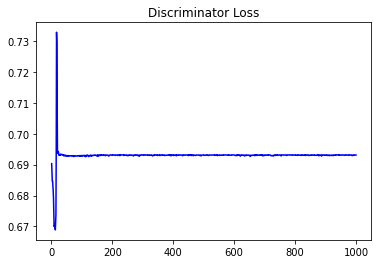

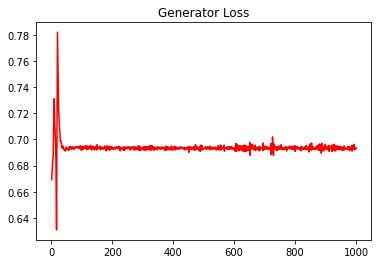

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.016011295351278754


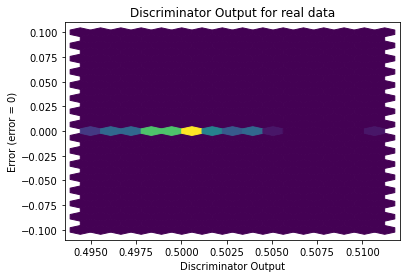

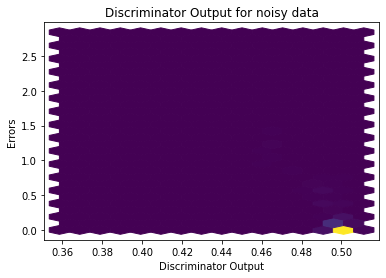

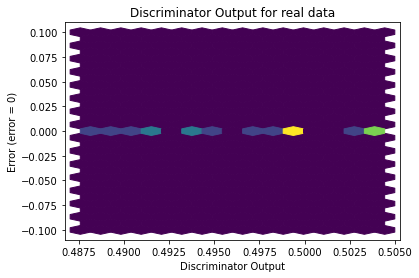

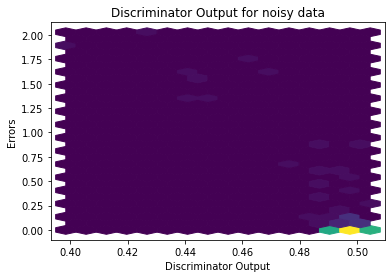

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


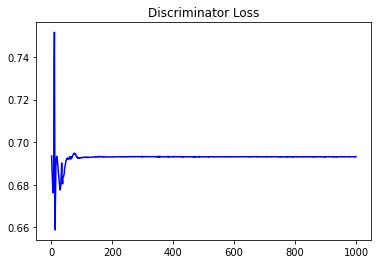

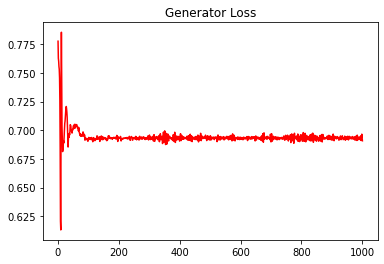

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0333974977035048


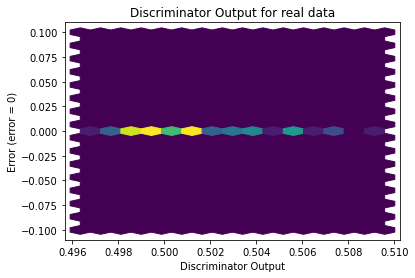

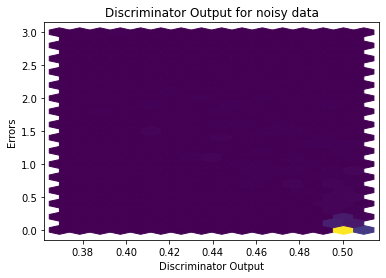

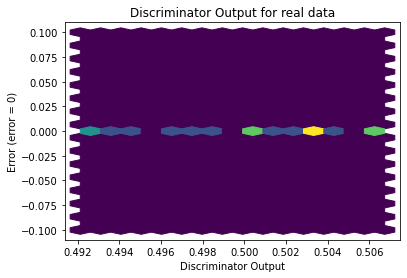

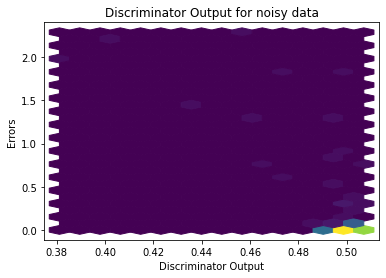

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3035]], requires_grad=True)
